In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
df = pd.read_csv(r"Diwali Sales Data.csv",encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [30]:
df.shape

(11251, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [32]:
df.drop(columns=(['Status','unnamed1']),inplace=True)
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [40]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [41]:
# drop null values
df.dropna(inplace=True)

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [45]:
# change data type
df['Amount'] = df['Amount'].astype(int)

In [47]:
df['Amount'].dtype

dtype('int32')

In [52]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

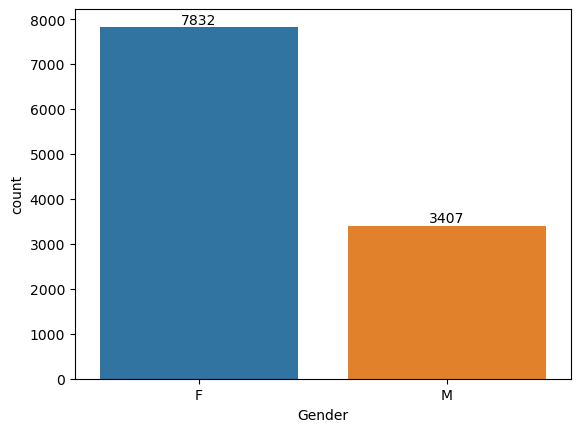

In [65]:
ax = sns.countplot(x = "Gender",data = df)
for bars in ax.containers:
    ax.bar_label(bars)
    

In [83]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

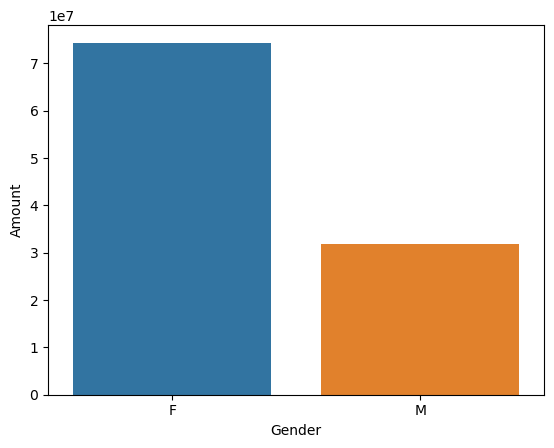

In [98]:
sns.barplot(data=sales_gen,x = 'Gender' , y = 'Amount')

#### Conclusion: From above graph we can see that most of the buyers are females and even the purchasing power of female are greater then men. 

# Age

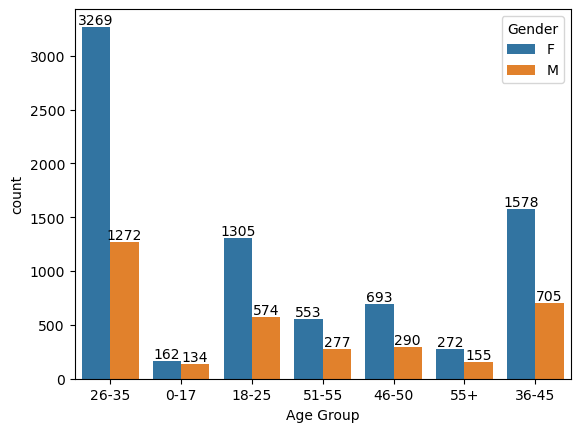

In [103]:
ax = sns.countplot(data=df, x = "Age Group",hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

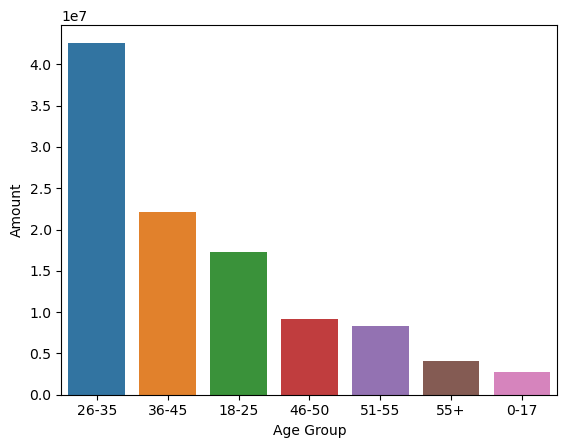

In [134]:
sales_age = df.groupby(["Age Group"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(data=sales_age,x = 'Age Group',y='Amount')

### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# State

In [135]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

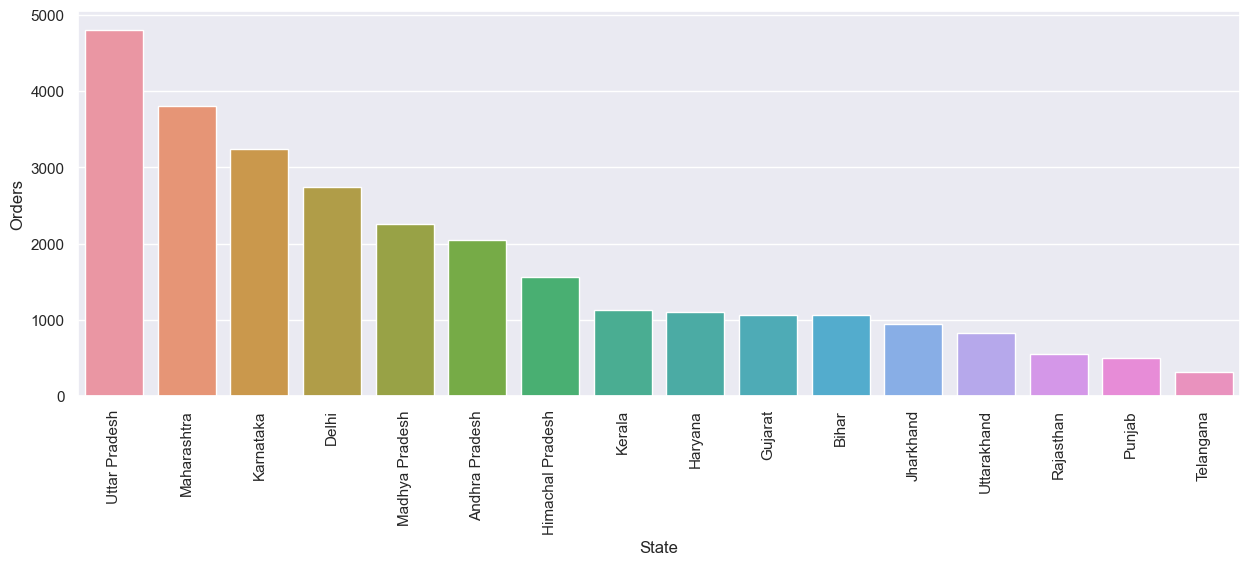

In [149]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set({'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x = 'State',y='Orders')
plt.xticks(rotation = 90)
plt.show()

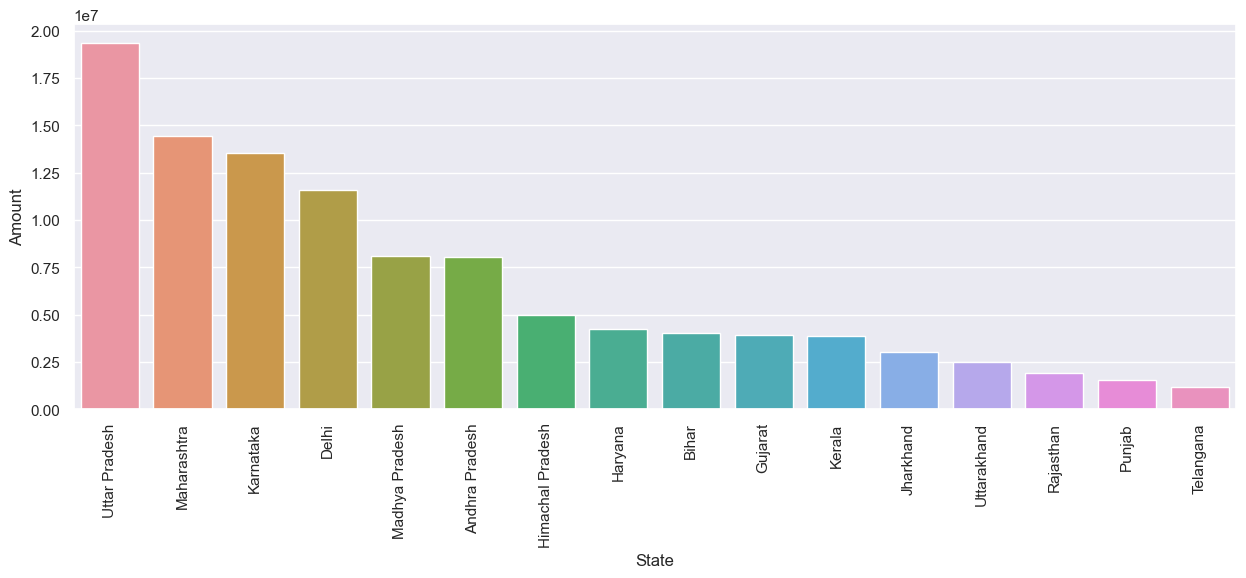

In [155]:
amount_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False)
sns.set({'figure.figsize':(15,5)})
sns.barplot(data=amount_state, x = 'State',y='Amount')
plt.xticks(rotation = 90)
plt.show()

#### From above graphs we can see that most of the orders & total sales/amount are from Uttar pradsh, Maharashtra and Karnataka respectively.

# Marital Status

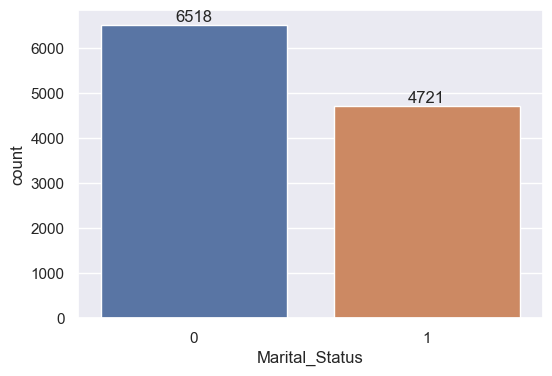

In [167]:
sns.set({'figure.figsize':(6,4)})
ax = sns.countplot(data=df,x='Marital_Status')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

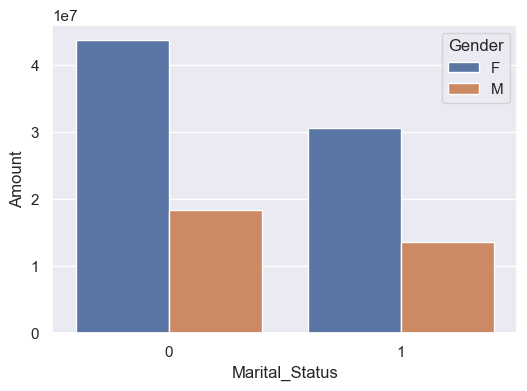

In [168]:
sales_marital = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_marital,x='Marital_Status',y='Amount',hue='Gender')

#### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

In [170]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

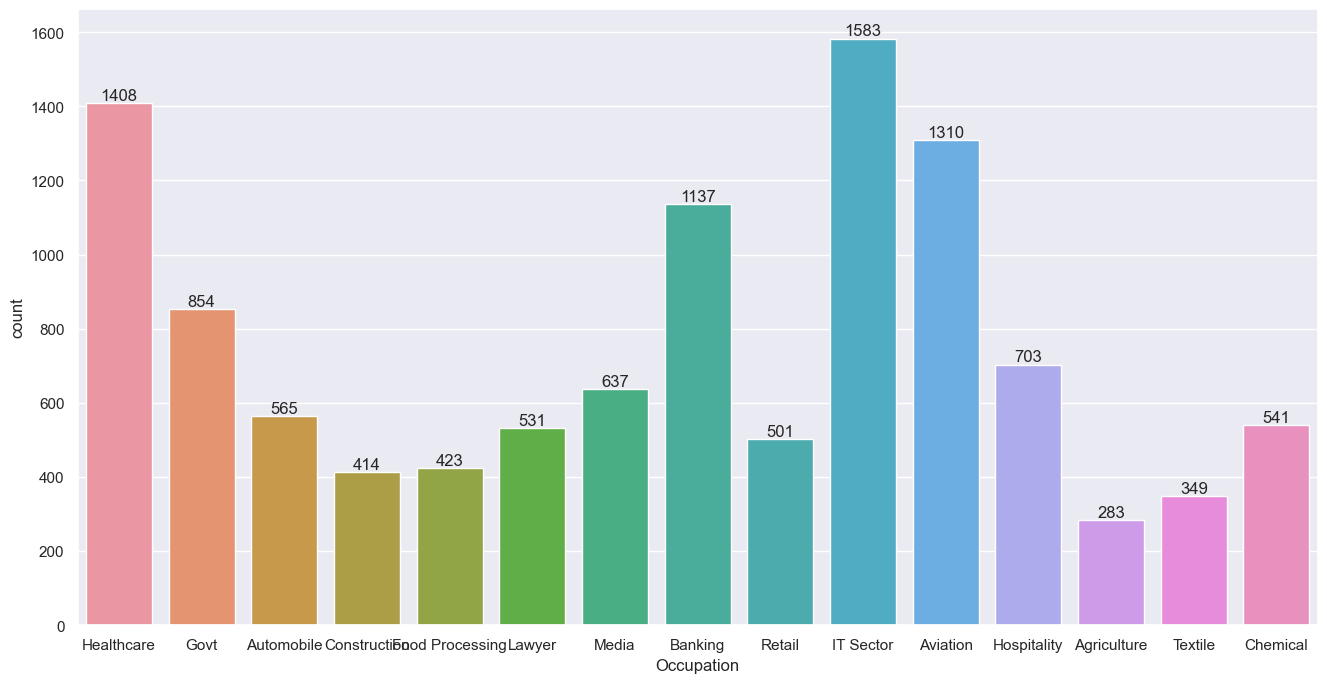

In [175]:
sns.set({'figure.figsize':(16,8)})
ax = sns.countplot(data=df,x='Occupation')
for bar in ax.containers:
    ax.bar_label(bar)

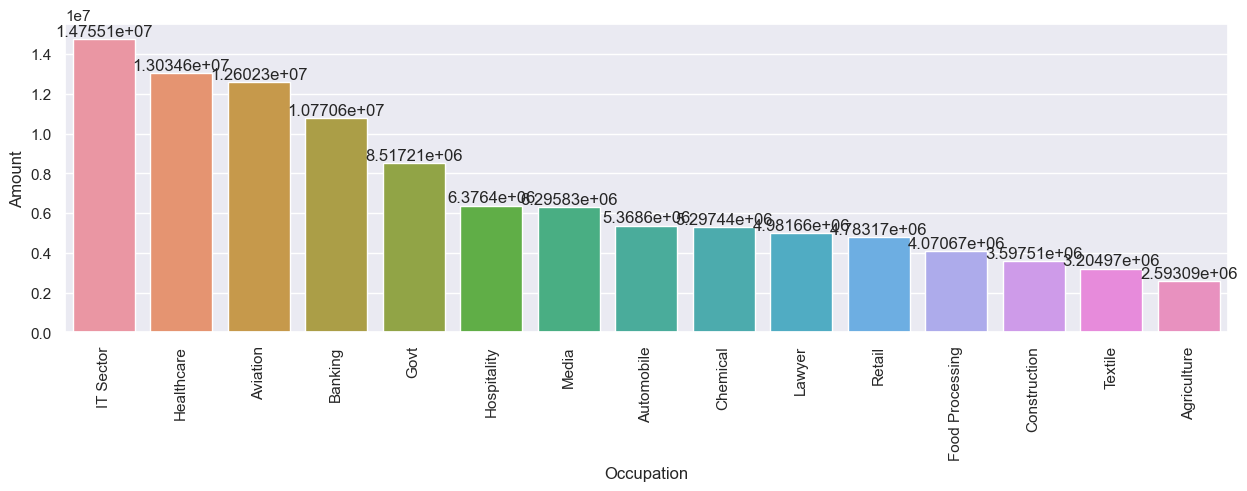

In [201]:
sales_occu = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(data=sales_occu,x='Occupation',y='Amount')
plt.xticks(rotation = 90)
plt.show()

### From above Graph we can see that most of the buyers are working in IT sector, Healthcare, Aviation sector 

# Product Category

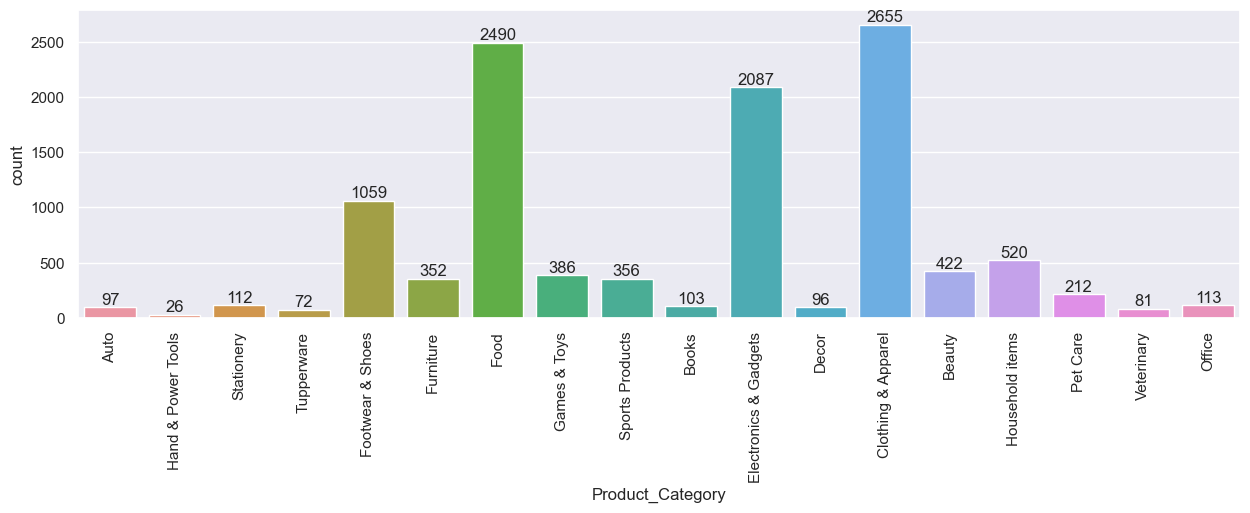

In [208]:
sns.set({'figure.figsize':(15,4)})
ax = sns.countplot(data=df,x='Product_Category')
for bar in ax.containers:
    ax.bar_label(bar)
    
    
plt.xticks(rotation = 90)
plt.show()

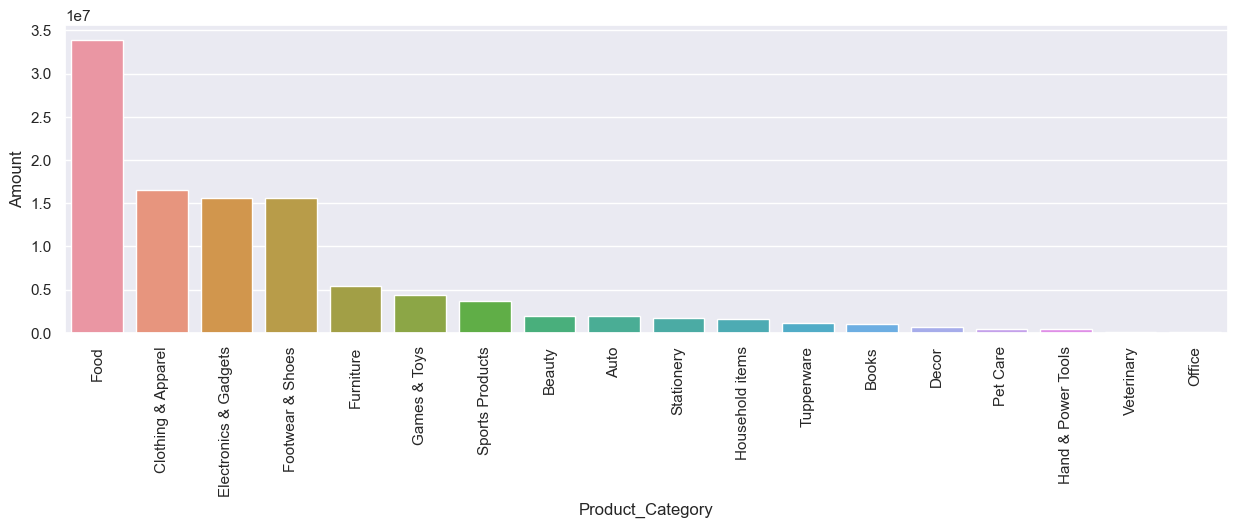

In [213]:
sales_cat = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(data=sales_cat,x = 'Product_Category',y='Amount')
plt.xticks(rotation = 90)
plt.show()

#### From above graphs we can see that most of the sold products are from Food, Clothing & Apparel,Electronics & Gadgets

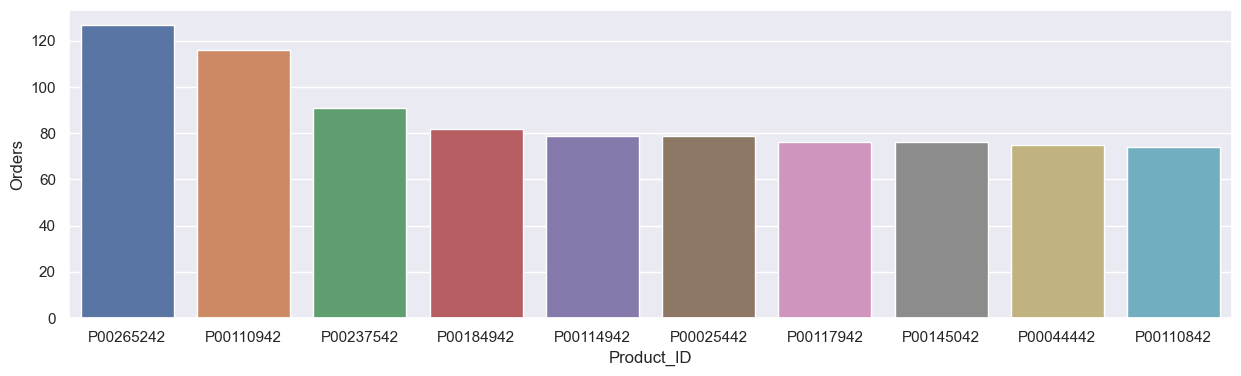

In [224]:
sales_prodcut_id = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

ax = sns.barplot(data=sales_prodcut_id,x = 'Product_ID',y='Orders')


<Axes: xlabel='Product_ID'>

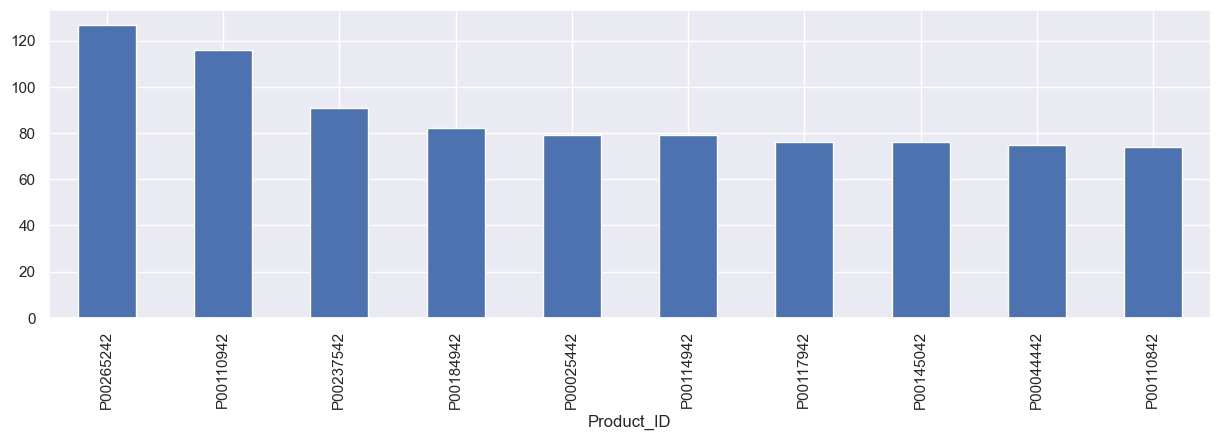

In [230]:
# OR
df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

### Married women age group 26-35yrs from UP,Maharastra and Karnataka working in IT, Healthcare and Aviation are most likely to buy products from Food, Clothing and Electronics category.